## *Principles of Data Science - Edward St John (210018085)*

### Table of Contents

* [Chapter 1 - Data Preparation](#chapter1)
    * [1.1 - Extraction of Data](#1_1)
    * [1.2 - Data Analysis & Cleaning](#1_2)
        * [1.2.1 - Investigating Structure of Data](#1_2_1)
        * [1.2.2 - Identifying Missing Values](#1_2_2)
        * [1.2.3 - Identifying Outliers](#1_2_3)
* [Chapter 2 - Data Derivation](#chapter2)
    * [2.1 - Extracting Important Variables](#2_1)
    * [2.2 - Adding Distance to Goal Variable](#2_2)
    * [2.3 - Adding Long Shot Variable](#2_3)
    * [2.4 - Slicing Shot Data by Player](#2_4)
    * [2.5 - Adding Goal Variable](#2_5)
* [Chapter 3 - Construction of Models](#chapter3)
    * [3.1 - Creating General Model](#3_1)
    * [3.2 - Creating Long Shot Model](#3_2)
    * [3.2 - Creating Short Shot Model](#3_3)
* [Chapter 4 - Predicting on New Data](#chapter4)
    * [4.1 - Importing 2021 Data](#4_1)
    * [4.2 - Model Prediction](#4_2)

### Chapter 1 - Data Preparation <a class="anchor" id="chapter1"></a>

#### 1.1 - Extraction of Data <a class="anchor" id="1_1"></a>

In [58]:
# Data initially scraped from understat.com using script from:
# https://github.com/harryrgrove/understat_scrape/blob/master/init_data.py
# Script has been amended in order to only capture Premier League data from 2014 to 2020

In [299]:
import os
import numpy as np
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch

In [12]:
# Data currently in multiple csv's split by team + year, need to create one csv containing all data
root_dir = os.getcwd()
leagues, seasons = ['epl'], np.arange(2014, 2021)
 
dfs = []

In [13]:
# Adding all shot data to one big csv
for league, season in it.product(leagues, seasons):
    path = '{}/raw_data/{}/{}'.format(root_dir, league, season)
    for sub_dir, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('shot_df.pickle'):
                all_shots = pd.read_pickle(os.path.join(sub_dir, file))
                dfs.append(all_shots)

all_shots = pd.concat(dfs)
# Taking out penalties from shot data as not representative of finishing skill for this model
all_shots = all_shots[all_shots['situation'] != 'Penalty']
print(all_shots)

        shot_type   situation       result        xG minute team_score  \
14429   RightFoot    OpenPlay  BlockedShot  0.007046     33          1   
14430        Head  FromCorner         Goal  0.076413     34          1   
14435    LeftFoot    OpenPlay  BlockedShot  0.018911     56          1   
14436    LeftFoot    OpenPlay    SavedShot  0.055782     56          1   
14717    LeftFoot    SetPiece  MissedShots  0.021474     46          1   
...           ...         ...          ...       ...    ...        ...   
424117       Head    SetPiece  MissedShots  0.086541     61          0   
424099   LeftFoot    OpenPlay    SavedShot  0.017523      2          0   
424102   LeftFoot    OpenPlay    SavedShot  0.021521      9          0   
424110   LeftFoot    OpenPlay    SavedShot  0.052311     43          0   
424103  RightFoot  FromCorner  MissedShots  0.076302     10          0   

       opponent_score                     name understat_id location  \
14429               2         Marouane 

In [14]:
# Exporting new data to csv
all_shots.to_csv('all_data.csv')

**Run code from here (after importing libraries above)**

In [99]:
# Importing csv so code can run starting at this cell, otherwise would create file again if run from beginning
all_shots = pd.read_csv('all_data.csv')

#### 1.2 - Data Analysis & Cleaning <a class="anchor" id="1_2"></a>
##### 1.2.1 - Investigating Structure of Data <a class="anchor" id="1_2_1"></a>

In [100]:
# Looking at the structure of our data
# Note: xG = Expected Goals, i.e. the probability of a shot going in the goal. Elaborated more in the report
print("{} rows, {} columns".format(all_shots.shape[0], all_shots.shape[1]))
display(all_shots.head())

66423 rows, 18 columns


,Unnamed: 0,shot_type,situation,result,xG,minute,team_score,opponent_score,name,understat_id,location,team,opponent,assist,date,match_id,season,position
0,14429,RightFoot,OpenPlay,BlockedShot,0.007046,33,1,2,Marouane Chamakh,905,a,Crystal Palace,Arsenal,NaN,2014-08-16 17:30:00,4755,2014,"(0.5679999923706055, 0.3370000076293945)"
1,14430,Head,FromCorner,Goal,0.076413,34,1,2,Brede Hangeland,933,a,Crystal Palace,Arsenal,Jason Puncheon,2014-08-16 17:30:00,4755,2014,"(0.9619999694824218, 0.4470000076293945)"
2,14435,LeftFoot,OpenPlay,BlockedShot,0.018911,56,1,2,Jason Puncheon,514,a,Crystal Palace,Arsenal,Marouane Chamakh,2014-08-16 17:30:00,4755,2014,"(0.769000015258789, 0.29100000381469726)"
3,14436,LeftFoot,OpenPlay,SavedShot,0.055782,56,1,2,Jason Puncheon,514,a,Crystal Palace,Arsenal,Marouane Chamakh,2014-08-16 17:30:00,4755,2014,"(0.8080000305175781, 0.49)"
4,14717,LeftFoot,SetPiece,MissedShots,0.021474,46,1,3,Damien Delaney,511,h,Crystal Palace,West Ham,NaN,2014-08-23 15:00:00,4761,2014,"(0.8869999694824219, 0.2560000038146973)"


In [101]:
# Checking all columns are interpreted corrrectly (i.e. numerical columns identified as numerical etc)
all_shots.dtypes

Unnamed: 0          int64
shot_type          object
situation          object
result             object
xG                float64
minute              int64
team_score          int64
opponent_score      int64
name               object
understat_id        int64
location           object
team               object
opponent           object
assist             object
date               object
match_id            int64
season              int64
position           object
dtype: object

In [102]:
# See how many unique values in each column
all_shots.nunique(axis=0)

Unnamed: 0        66423
shot_type             4
situation             4
result                6
xG                65873
minute              105
team_score           10
opponent_score       10
name               1202
understat_id       1204
location              2
team                 31
opponent             31
assist             1195
date               1595
match_id           2660
season                7
position          45960
dtype: int64

All looks correct from above, e.g. right number of seasons, shot type, location (home or away) etc

In [103]:
# Summarise data (with extra formatting)
all_shots.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Unnamed: 0,xG,minute,team_score,opponent_score,understat_id,match_id,season
count,66423.000000,66423.000000,66423.000000,66423.000000,66423.000000,66423.000000,66423.000000,66423.000000
mean,194610.208602,0.101159,48.834425,1.528627,1.265255,1932.522861,7123.300619,2016.954157
std,134384.443486,0.143893,26.541148,1.323074,1.188578,2270.326816,4750.391826,2.000397
min,14424.000000,0.000000,0.000000,0.000000,0.000000,12.000000,81.000000,2014.000000
25%,58355.500000,0.024683,26.000000,1.000000,0.000000,606.000000,3411.000000,2015.000000
50%,182791.000000,0.051152,49.000000,1.000000,1.000000,782.000000,7283.000000,2017.000000
75%,324079.500000,0.094480,72.000000,2.000000,2.000000,1740.000000,11714.000000,2019.000000
max,424195.000000,0.979887,104.000000,9.000000,9.000000,9524.000000,14814.000000,2020.000000


##### 1.2.2 - Identifying Missing Values <a class="anchor" id="1_2_2"></a>

In [104]:
# Surprising to find xG values with a probability of 0 above in the 'min' column, need to investigate further
all_shots.loc[all_shots['xG'] == 0]

,Unnamed: 0,shot_type,situation,result,xG,minute,team_score,opponent_score,name,understat_id,location,team,opponent,assist,date,match_id,season,position
505,15179,RightFoot,OpenPlay,OwnGoal,0.0,10,4,2,John Terry,917,h,Chelsea,Swansea,NaN,2014-09-13 15:00:00,4720,2014,"(0.030999999046325683, 0.5120000076293946)"
1040,15400,OtherBodyPart,SetPiece,OwnGoal,0.0,81,2,2,Harry Kane,647,a,Tottenham,Sunderland,NaN,2014-09-13 15:00:00,4724,2014,"(0.029000000953674318, 0.5820000076293945)"
1485,21965,OtherBodyPart,OpenPlay,OwnGoal,0.0,85,0,3,Jan Vertonghen,640,a,Tottenham,Stoke,NaN,2015-05-09 15:00:00,4414,2014,"(0.034000000953674316, 0.395)"
1722,18547,Head,FromCorner,OwnGoal,0.0,68,1,4,Jonjo Shelvey,769,a,Swansea,Liverpool,NaN,2014-12-29 20:00:00,4648,2014,"(0.00800000011920929, 0.5670000076293945)"
2647,16072,LeftFoot,OpenPlay,OwnGoal,0.0,55,1,2,Kieran Gibbs,545,h,Arsenal,Manchester United,NaN,2014-11-22 17:30:00,4675,2014,"(0.08, 0.5220000076293946)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64692,387142,LeftFoot,FromCorner,OwnGoal,0.0,9,0,2,Federico Fernández,708,h,Newcastle United,Chelsea,NaN,2020-11-21 12:30:00,14521,2020,"(0.017999999523162842, 0.4779999923706055)"
64746,394234,Head,FromCorner,OwnGoal,0.0,41,1,1,Matt Ritchie,461,h,Newcastle United,Fulham,NaN,2020-12-19 20:00:00,14571,2020,"(0.017000000476837158, 0.45799999237060546)"
64902,409684,LeftFoot,OpenPlay,OwnGoal,0.0,85,1,1,Ciaran Clark,875,h,Newcastle United,Aston Villa,NaN,2021-03-12 20:00:00,14712,2020,"(0.09800000190734863, 0.48)"
65235,402477,LeftFoot,OpenPlay,OwnGoal,0.0,33,0,9,Jan Bednarek,6042,a,Southampton,Manchester United,NaN,2021-02-02 20:15:00,14651,2020,"(0.051999998092651364, 0.49)"


In [106]:
# These are all attributed to own goals, which won't have an affect on a player's finishing
# ability. We can take this data out.

# Removing own goals data
all_shots = all_shots.drop(all_shots[all_shots.xG == 0].index)
# Checking all values correctly removed
all_shots.loc[all_shots['xG'] == 0].head()

,Unnamed: 0,shot_type,situation,result,xG,minute,team_score,opponent_score,name,understat_id,location,team,opponent,assist,date,match_id,season,position


In [107]:
# Dealt with '0' values, now need to investigate missing data
all_shots.isnull()

,Unnamed: 0,shot_type,situation,result,xG,minute,team_score,opponent_score,name,understat_id,location,team,opponent,assist,date,match_id,season,position
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66418,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
66419,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
66420,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
66421,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [108]:
# Further investigation into missing values, searching by column
print(all_shots.isnull().any())
print(all_shots.isnull().sum().sum())

Unnamed: 0        False
shot_type         False
situation         False
result            False
xG                False
minute            False
team_score        False
opponent_score    False
name              False
understat_id      False
location          False
team              False
opponent          False
assist             True
date              False
match_id          False
season            False
position          False
dtype: bool
16625


We can see there are a total of 16,625 missing values in this dataset. However, these all come under the 'assist' column which is expected to have some missing values given not every goal attempt has someone who assisted it.

##### 1.2.3 - Identifying Outliers <a class="anchor" id="1_2_3"></a>

<AxesSubplot:xlabel='xG'>

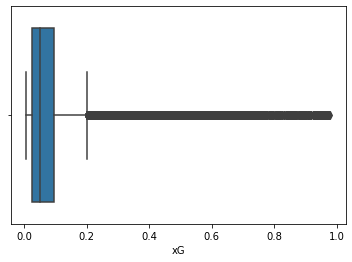

In [109]:
# Visualisting xG as a boxplot to detect outliers
sns.boxplot(x=all_shots['xG'])

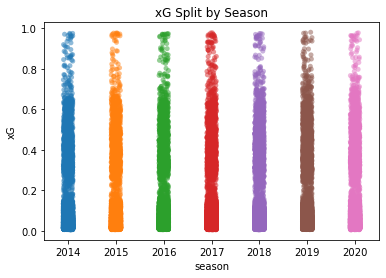

In [110]:
# Dataset too big to gain any value from a boxplot, need to split by different years
xG_Year = sns.stripplot(y='xG', x='season', 
                   data=all_shots, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,).set(title='xG Split by Season')

All distributions look similar across the years which is a good sign, no outliers stick out. The summary statistics in Section 1.2.1 show there are no values below 0 or above 1 which would classify as outliers as it's impossible for xG (which is a measure of probability) to be below 0 or above 1.

### Chapter 2 - Data Derivation <a class="anchor" id="chapter2"></a>
#### 2.1 - Extracting Important Variables <a class="anchor" id="2_1"></a>

In [111]:
# Some of the variables in the data won't be useful at all for out analysis on finishing skill,
# so they are going to be removed

# First column isn't needed (this is just acting like an index when we already have our own)
del all_shots['Unnamed: 0']

# This is just the id understat use to identify the event on their end
del all_shots['understat_id']

# Date can be removed as we already have the season year and the match id to identify the specific match
del all_shots['date']

# Note: assist data is being left in which may not be used for this finishing skill analysis, but
# may potentially be used as additional analysis later on

all_shots.head()

,shot_type,situation,result,xG,minute,team_score,opponent_score,name,location,team,opponent,assist,match_id,season,position
0,RightFoot,OpenPlay,BlockedShot,0.007046,33,1,2,Marouane Chamakh,a,Crystal Palace,Arsenal,NaN,4755,2014,"(0.5679999923706055, 0.3370000076293945)"
1,Head,FromCorner,Goal,0.076413,34,1,2,Brede Hangeland,a,Crystal Palace,Arsenal,Jason Puncheon,4755,2014,"(0.9619999694824218, 0.4470000076293945)"
2,LeftFoot,OpenPlay,BlockedShot,0.018911,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"(0.769000015258789, 0.29100000381469726)"
3,LeftFoot,OpenPlay,SavedShot,0.055782,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"(0.8080000305175781, 0.49)"
4,LeftFoot,SetPiece,MissedShots,0.021474,46,1,3,Damien Delaney,h,Crystal Palace,West Ham,NaN,4761,2014,"(0.8869999694824219, 0.2560000038146973)"


#### 2.2 - Adding Distance to Goal Variable <a class="anchor" id="2_2"></a>

In [112]:
# Removing brackets from position variable to split x and y values easier
# Taking away first character
all_shots['position'] = all_shots['position'].apply(lambda x : x[1:])
# Taking away last character
all_shots['position'] = all_shots['position'].apply(lambda x : x[:-1])
all_shots.head()

,shot_type,situation,result,xG,minute,team_score,opponent_score,name,location,team,opponent,assist,match_id,season,position
0,RightFoot,OpenPlay,BlockedShot,0.007046,33,1,2,Marouane Chamakh,a,Crystal Palace,Arsenal,NaN,4755,2014,"0.5679999923706055, 0.3370000076293945"
1,Head,FromCorner,Goal,0.076413,34,1,2,Brede Hangeland,a,Crystal Palace,Arsenal,Jason Puncheon,4755,2014,"0.9619999694824218, 0.4470000076293945"
2,LeftFoot,OpenPlay,BlockedShot,0.018911,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.769000015258789, 0.29100000381469726"
3,LeftFoot,OpenPlay,SavedShot,0.055782,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.8080000305175781, 0.49"
4,LeftFoot,SetPiece,MissedShots,0.021474,46,1,3,Damien Delaney,h,Crystal Palace,West Ham,NaN,4761,2014,"0.8869999694824219, 0.2560000038146973"


In [113]:
# Splitting x and y values using the comma in the middle
x = []
y = []

for row in all_shots['position']:
    x.append(row.split(',')[0])
    y.append(row.split(',')[1])
    
# Adding columns to data
all_shots['x'] = x
all_shots['y'] = y

all_shots.head()

,shot_type,situation,result,xG,minute,team_score,opponent_score,name,location,team,opponent,assist,match_id,season,position,x,y
0,RightFoot,OpenPlay,BlockedShot,0.007046,33,1,2,Marouane Chamakh,a,Crystal Palace,Arsenal,NaN,4755,2014,"0.5679999923706055, 0.3370000076293945",0.5679999923706055,0.3370000076293945
1,Head,FromCorner,Goal,0.076413,34,1,2,Brede Hangeland,a,Crystal Palace,Arsenal,Jason Puncheon,4755,2014,"0.9619999694824218, 0.4470000076293945",0.9619999694824218,0.4470000076293945
2,LeftFoot,OpenPlay,BlockedShot,0.018911,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.769000015258789, 0.29100000381469726",0.769000015258789,0.29100000381469726
3,LeftFoot,OpenPlay,SavedShot,0.055782,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.8080000305175781, 0.49",0.8080000305175781,0.49
4,LeftFoot,SetPiece,MissedShots,0.021474,46,1,3,Damien Delaney,h,Crystal Palace,West Ham,NaN,4761,2014,"0.8869999694824219, 0.2560000038146973",0.8869999694824219,0.2560000038146973


In [114]:
# Checking datatype of new columns
all_shots.dtypes

shot_type          object
situation          object
result             object
xG                float64
minute              int64
team_score          int64
opponent_score      int64
name               object
location           object
team               object
opponent           object
assist             object
match_id            int64
season              int64
position           object
x                  object
y                  object
dtype: object

In [115]:
# Need to convert x and y to numerical columns
all_shots['x'] = pd.to_numeric(all_shots['x'])
all_shots['y'] = pd.to_numeric(all_shots['y'])
all_shots.dtypes

shot_type          object
situation          object
result             object
xG                float64
minute              int64
team_score          int64
opponent_score      int64
name               object
location           object
team               object
opponent           object
assist             object
match_id            int64
season              int64
position           object
x                 float64
y                 float64
dtype: object

In [116]:
# Converting x and y values into distances from goal
# i.e. x needs to be (1-x) as currently a value of 0.9 means it is 0.1 away from the goal
# y needs to be the distance from 0.5 as the value of 0.5 is where the goal is (in the middle of the line)

all_shots['x'] = 1 - all_shots['x']
all_shots['y'] = all_shots['y'] - 0.5
all_shots.head()

,shot_type,situation,result,xG,minute,team_score,opponent_score,name,location,team,opponent,assist,match_id,season,position,x,y
0,RightFoot,OpenPlay,BlockedShot,0.007046,33,1,2,Marouane Chamakh,a,Crystal Palace,Arsenal,NaN,4755,2014,"0.5679999923706055, 0.3370000076293945",0.432,-0.163
1,Head,FromCorner,Goal,0.076413,34,1,2,Brede Hangeland,a,Crystal Palace,Arsenal,Jason Puncheon,4755,2014,"0.9619999694824218, 0.4470000076293945",0.038,-0.053
2,LeftFoot,OpenPlay,BlockedShot,0.018911,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.769000015258789, 0.29100000381469726",0.231,-0.209
3,LeftFoot,OpenPlay,SavedShot,0.055782,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.8080000305175781, 0.49",0.192,-0.010
4,LeftFoot,SetPiece,MissedShots,0.021474,46,1,3,Damien Delaney,h,Crystal Palace,West Ham,NaN,4761,2014,"0.8869999694824219, 0.2560000038146973",0.113,-0.244


In [117]:
all_shots.dtypes

shot_type          object
situation          object
result             object
xG                float64
minute              int64
team_score          int64
opponent_score      int64
name               object
location           object
team               object
opponent           object
assist             object
match_id            int64
season              int64
position           object
x                 float64
y                 float64
dtype: object

In [118]:
# Adding distance column using Pythagoras

all_shots['distance'] = np.sqrt((np.square(all_shots['x']) + np.square(all_shots['y'])))
all_shots.head()

,shot_type,situation,result,xG,minute,team_score,opponent_score,name,location,team,opponent,assist,match_id,season,position,x,y,distance
0,RightFoot,OpenPlay,BlockedShot,0.007046,33,1,2,Marouane Chamakh,a,Crystal Palace,Arsenal,NaN,4755,2014,"0.5679999923706055, 0.3370000076293945",0.432,-0.163,0.461728
1,Head,FromCorner,Goal,0.076413,34,1,2,Brede Hangeland,a,Crystal Palace,Arsenal,Jason Puncheon,4755,2014,"0.9619999694824218, 0.4470000076293945",0.038,-0.053,0.065215
2,LeftFoot,OpenPlay,BlockedShot,0.018911,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.769000015258789, 0.29100000381469726",0.231,-0.209,0.311516
3,LeftFoot,OpenPlay,SavedShot,0.055782,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.8080000305175781, 0.49",0.192,-0.010,0.192260
4,LeftFoot,SetPiece,MissedShots,0.021474,46,1,3,Damien Delaney,h,Crystal Palace,West Ham,NaN,4761,2014,"0.8869999694824219, 0.2560000038146973",0.113,-0.244,0.268896


#### 2.3 - Adding Long Shot Variable <a class="anchor" id="2_3"></a>

In [119]:
# Defining long shot as anything past the penalty arc outside the 18-yard box

# Need to calculate a scale for converting yards to our distance values
# A penalty is taken at 12 yards, which equals an x position value of 0.885 from our data (or 0.115 away from goal)
scale = 0.115 / 12
scale

0.009583333333333334

In [120]:
# Penalty arc is 22 yards away from goal, need to convert to our distance values
arc_distance = 22 * scale
arc_distance

0.21083333333333334

In [121]:
# Generating long_shot variable using arc distance above
longshot = []
for value in all_shots['distance']:
    if value >= 0.21083333333333334:
        longshot.append(1)
    else:
        longshot.append(0)

all_shots['long_shot'] = longshot
all_shots.head()

,shot_type,situation,result,xG,minute,team_score,opponent_score,name,location,team,opponent,assist,match_id,season,position,x,y,distance,long_shot
0,RightFoot,OpenPlay,BlockedShot,0.007046,33,1,2,Marouane Chamakh,a,Crystal Palace,Arsenal,NaN,4755,2014,"0.5679999923706055, 0.3370000076293945",0.432,-0.163,0.461728,1
1,Head,FromCorner,Goal,0.076413,34,1,2,Brede Hangeland,a,Crystal Palace,Arsenal,Jason Puncheon,4755,2014,"0.9619999694824218, 0.4470000076293945",0.038,-0.053,0.065215,0
2,LeftFoot,OpenPlay,BlockedShot,0.018911,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.769000015258789, 0.29100000381469726",0.231,-0.209,0.311516,1
3,LeftFoot,OpenPlay,SavedShot,0.055782,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.8080000305175781, 0.49",0.192,-0.010,0.192260,0
4,LeftFoot,SetPiece,MissedShots,0.021474,46,1,3,Damien Delaney,h,Crystal Palace,West Ham,NaN,4761,2014,"0.8869999694824219, 0.2560000038146973",0.113,-0.244,0.268896,1


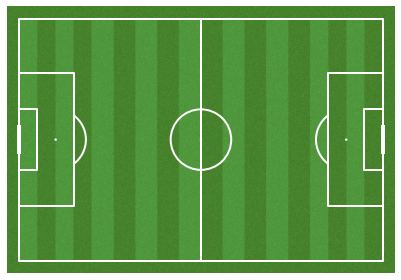

In [301]:
# Visualising pitch to show what is defined as a long shot

pitch = Pitch(pitch_color='grass', line_color='white',
              stripe=True, pitch_length=105, pitch_width=68)
fig, ax = pitch.draw()

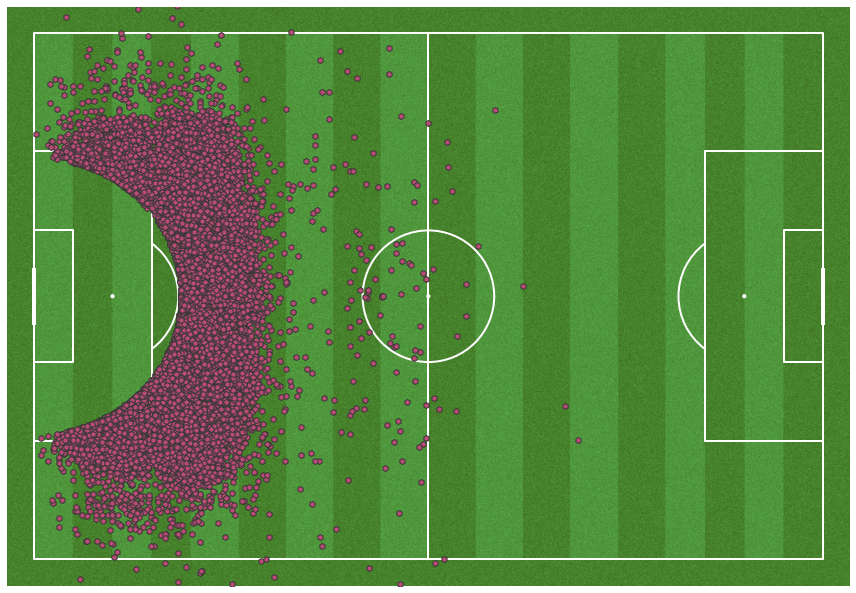

In [343]:
# Plotting long shots on pitch
# Unfortunately unable to standardise data as mplsoccer library doesn't support Understat data, so we
# have to roughly guess the scale factors

fig, ax = pitch.draw(figsize=(12, 10))
sc = pitch.scatter(long_shots.x*106, long_shots.y*100+40,
                   c='#b94b75',  # color for scatter in hex format
                   edgecolors='#383838',
                   marker='h',
                   ax=ax)

#### 2.4 - Slicing Shot Data by Player <a class="anchor" id="2_4"></a>

In [122]:
# Slicing data frame based on unique player names

UniquePlayers = all_shots.name.unique()

# Dictionary to store all player names in
PlayerDict = {name : pd.DataFrame for name in UniquePlayers}

# For loop to return the shot data when name input equals name column in all_shots
for name in PlayerDict.keys():
    PlayerDict[name] = all_shots[:][all_shots.name == name]

In [123]:
# Testing dictionary works
PlayerDict['Neal Maupay'].head()

,shot_type,situation,result,xG,minute,team_score,opponent_score,name,location,team,opponent,assist,match_id,season,position,x,y,distance,long_shot
54989,LeftFoot,OpenPlay,Goal,0.394656,76,3,0,Neal Maupay,a,Brighton,Watford,Lewis Dunk,11648,2019,"0.95, 0.7080000305175781",0.050,0.208,0.213925,1
54998,RightFoot,FromCorner,MissedShots,0.058196,90,1,1,Neal Maupay,h,Brighton,West Ham,Florin Andone,11655,2019,"0.865, 0.5420000076293945",0.135,0.042,0.141382,0
54999,RightFoot,OpenPlay,MissedShots,0.461642,71,1,1,Neal Maupay,h,Brighton,West Ham,Glenn Murray,11655,2019,"0.909000015258789, 0.515",0.091,0.015,0.092228,0
55007,RightFoot,OpenPlay,SavedShot,0.076787,5,0,2,Neal Maupay,h,Brighton,Southampton,Leandro Trossard,11666,2019,"0.8480000305175781, 0.610999984741211",0.152,0.111,0.188215,0
55008,Head,FromCorner,BlockedShot,0.311387,6,0,2,Neal Maupay,h,Brighton,Southampton,Leandro Trossard,11666,2019,"0.960999984741211, 0.45099998474121095",0.039,-0.049,0.062626,0


#### 2.5 - Adding Goal Variable <a class="anchor" id="2_5"></a>

In [125]:
# Finding where goals were scored

# Adding G column for goals (1 for a goal, 0 for not)
all_shots['G'] = 0
# Setting value of 1 where there is a goal
all_shots.loc[all_shots['result'] == 'Goal', 'G'] = 1
all_shots.head()

,shot_type,situation,result,xG,minute,team_score,opponent_score,name,location,team,opponent,assist,match_id,season,position,x,y,distance,long_shot,G
0,RightFoot,OpenPlay,BlockedShot,0.007046,33,1,2,Marouane Chamakh,a,Crystal Palace,Arsenal,NaN,4755,2014,"0.5679999923706055, 0.3370000076293945",0.432,-0.163,0.461728,1,0
1,Head,FromCorner,Goal,0.076413,34,1,2,Brede Hangeland,a,Crystal Palace,Arsenal,Jason Puncheon,4755,2014,"0.9619999694824218, 0.4470000076293945",0.038,-0.053,0.065215,0,1
2,LeftFoot,OpenPlay,BlockedShot,0.018911,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.769000015258789, 0.29100000381469726",0.231,-0.209,0.311516,1,0
3,LeftFoot,OpenPlay,SavedShot,0.055782,56,1,2,Jason Puncheon,a,Crystal Palace,Arsenal,Marouane Chamakh,4755,2014,"0.8080000305175781, 0.49",0.192,-0.010,0.192260,0,0
4,LeftFoot,SetPiece,MissedShots,0.021474,46,1,3,Damien Delaney,h,Crystal Palace,West Ham,NaN,4761,2014,"0.8869999694824219, 0.2560000038146973",0.113,-0.244,0.268896,1,0


### Chapter 3 - Construction of Models <a class="anchor" id="chapter3"></a>

#### 3.1 - Creating General Model <a class="anchor" id="3_1"></a>

In [124]:
# Simple indicator of finishing skill is to assess over / underperformance of xG compared to actual goals
# Small sample sizes can be far too skewed doing this, a constant needs to be added to smooth the sample to
# provide better predictions

# Need to find the optimal constant, not too small to have unreasonable results and not too big as that it
# would show roughly xG = G meaning everyone has the same average finishing skill

# Constructing our simple model (G = Goals)
# simple = (G  + c) / (xG + c)

In [219]:
# Grouping xG by season
xGbySeason = all_shots.groupby(['name', 'season'])[['xG','G']].sum()

# Taking out seasons with < 3 xG to just have reasonable samples
xGbySeason = xGbySeason.loc[xGbySeason['xG'] >= 3]
xGbySeason.head()

xG  G
name           season             
Aaron Connolly 2019    4.553526  3
               2020    4.464137  2
Aaron Ramsey   2014    6.636926  6
               2015    8.614329  5
               2016    3.505755  1

In [204]:
# Iterating predictions through each player + each value of c, adding results to a df called error_df

error_df = pd.DataFrame(columns=["player", "train_season", "test_season", "c", "sq_error"])

for player in xGbySeason.index.get_level_values("name"):
    for season_x, season_y, c in it.product(xGbySeason.xs(player).index, xGbySeason.xs(player).index, range(0, 150, 10)):
        if season_x != season_y:
            row = {
                    "player": player,
                    "train_season": season_x,
                    "test_season": season_y,
                    "c": c,
                    "sq_error": (xGbySeason.loc[(player, season_y), "G"] - (((xGbySeason.loc[(player, season_x), "G"] + c) / (xGbySeason.loc[(player, season_x), "xG"] + c)) * xGbySeason.loc[(player, season_y), "xG"]))**2
                }
            error_df.loc[len(error_df)] = row

In [205]:
error_df

,player,train_season,test_season,c,sq_error
0,Aaron Connolly,2019,2020,0,0.885685
1,Aaron Connolly,2019,2020,10,3.950593
2,Aaron Connolly,2019,2020,20,4.759757
3,Aaron Connolly,2019,2020,30,5.123114
4,Aaron Connolly,2019,2020,40,5.329072
...,...,...,...,...,...
117775,Álvaro Morata,2018,2017,100,7.400210
117776,Álvaro Morata,2018,2017,110,7.486630
117777,Álvaro Morata,2018,2017,120,7.559766
117778,Álvaro Morata,2018,2017,130,7.622460


In [206]:
# Collating average of errors for each value of c to find minimum (and therefore optimal c value)
average_c = error_df.groupby(['c'])[['sq_error']].mean()
average_c

,sq_error
c,
0,14.321574
10,8.226923
20,7.471128
30,7.236911
40,7.140887
50,7.095662
60,7.072746
70,7.060794
80,7.054652


Optimal value of c for general model = 100

Text(0, 0.5, 'Error')

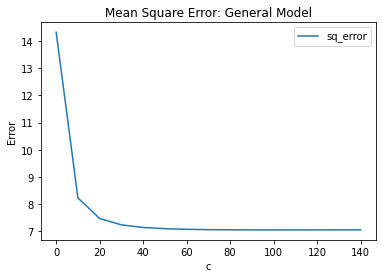

In [290]:
# Creating plot showing optimal c value
general_plot = error_df.groupby(['c'])[['sq_error']].mean().plot(kind='line', title='Mean Square Error: General Model')
general_plot.set_ylabel('Error')

#### 3.2 - Creating Long Shot Model <a class="anchor" id="3_2"></a>

In [222]:
# New dataframe just including long shots
long_shots = all_shots.loc[all_shots['long_shot'] == 1]

# Grouping xG by season to ignore seasons with less than 3 xG total (too small a sample size)
xGbySeason_long = long_shots.groupby(['name', 'season'])[['xG','G']].sum()

# Taking out seasons with < 0.5 total long shot xG to just have reasonable samples
xGbySeason_long = xGbySeason_long.loc[xGbySeason_long['xG'] >= 0.5]
xGbySeason_long

xG  G
name               season             
Aaron Cresswell    2015    0.769186  2
                   2017    0.586581  1
                   2020    0.604298  0
Aaron Mooy         2017    0.533629  0
                   2018    0.990780  1
...                             ... ..
Yves Bissouma      2018    0.522795  0
                   2020    0.791500  1
Zlatan Ibrahimovic 2016    1.763802  5
Álvaro Morata      2017    0.586336  0
Ángel Di María     2014    1.230301  1

[634 rows x 2 columns]

In [227]:
# Iterating predictions through each player + each value of c, adding results to a df called error_df_long
# Lower test values of c (with smaller steps) used as xG is a lot lower for all players meaning a lower optimal
# smoothing constant is expected

error_df_long = pd.DataFrame(columns=["player", "train_season", "test_season", "c", "sq_error"])

for player in xGbySeason_long.index.get_level_values("name"):
    for season_x, season_y, c in it.product(xGbySeason_long.xs(player).index, xGbySeason_long.xs(player).index, range(0, 40, 2)):
        if season_x != season_y:
            row = {
                    "player": player,
                    "train_season": season_x,
                    "test_season": season_y,
                    "c": c,
                    "sq_error": (xGbySeason_long.loc[(player, season_y), "G"] - (((xGbySeason_long.loc[(player, season_x), "G"] + c) / (xGbySeason_long.loc[(player, season_x), "xG"] + c)) * xGbySeason_long.loc[(player, season_y), "xG"]))**2
                }
            error_df_long.loc[len(error_df_long)] = row

In [228]:
error_df_long.head()

,player,train_season,test_season,c,sq_error
0,Aaron Cresswell,2015,2017,0,0.275836
1,Aaron Cresswell,2015,2017,2,0.023318
2,Aaron Cresswell,2015,2017,4,0.068663
3,Aaron Cresswell,2015,2017,6,0.094103
4,Aaron Cresswell,2015,2017,8,0.109619


In [229]:
# Collating average of errors for each value of c to find minimum (and therefore optimal c value)
average_c_long = error_df_long.groupby(['c'])[['sq_error']].mean()
average_c_long

,sq_error
c,
0,2.293442
2,1.177577
4,1.113307
6,1.101956
8,1.100488
10,1.101534
12,1.103220
14,1.104982
16,1.106641


Optimal value of c for long shot model = 8

Text(0, 0.5, 'Error')

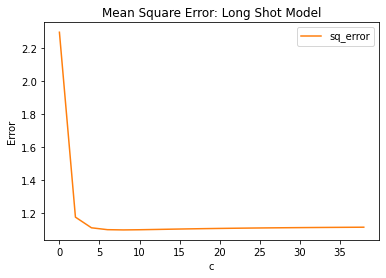

In [298]:
# Creating plot showing optimal c value
long_plot = error_df_long.groupby(['c'])[['sq_error']].mean().plot(kind='line', title='Mean Square Error: Long Shot Model', color='tab:orange')
long_plot.set_ylabel('Error')

#### 3.2 - Creating Short Shot Model <a class="anchor" id="3_3"></a>

In [232]:
# New dataframe just including short shots
short_shots = all_shots.loc[all_shots['long_shot'] == 0]

# Grouping xG by season to ignore seasons with less than 3 xG total (too small a sample size)
xGbySeason_short = short_shots.groupby(['name', 'season'])[['xG','G']].sum()

# Taking out seasons with < 2 total short shot xG to just have reasonable samples
xGbySeason_short = xGbySeason_short.loc[xGbySeason_short['xG'] >= 2]
xGbySeason_short

xG   G
name               season               
Aaron Connolly     2019     4.123171   2
                   2020     4.198505   2
Aaron Lennon       2015     2.035972   4
Aaron Mooy         2019     2.013157   2
Aaron Ramsey       2014     5.893585   6
...                              ...  ..
Zanka              2017     2.244065   0
Zlatan Ibrahimovic 2016    10.590658  10
Álvaro Morata      2017    13.318368  11
                   2018     6.141232   5
Álvaro Negredo     2016     6.844914   7

[847 rows x 2 columns]

In [242]:
# Iterating predictions through each player + each value of c, adding results to a df called error_df_short
# Higher test values of c (with a larger step) used as xG is a higher for all players meaning a higher optimal
# smoothing constant is expected

error_df_short = pd.DataFrame(columns=["player", "train_season", "test_season", "c", "sq_error"])

for player in xGbySeason_short.index.get_level_values("name"):
    for season_x, season_y, c in it.product(xGbySeason_short.xs(player).index, xGbySeason_short.xs(player).index, range(0, 400, 20)):
        if season_x != season_y:
            row = {
                    "player": player,
                    "train_season": season_x,
                    "test_season": season_y,
                    "c": c,
                    "sq_error": (xGbySeason_short.loc[(player, season_y), "G"] - (((xGbySeason_short.loc[(player, season_x), "G"] + c) / (xGbySeason_short.loc[(player, season_x), "xG"] + c)) * xGbySeason_short.loc[(player, season_y), "xG"]))**2
                }
            error_df_short.loc[len(error_df_short)] = row

In [243]:
error_df_short.head()

,player,train_season,test_season,c,sq_error
0,Aaron Connolly,2019,2020,0,0.001335
1,Aaron Connolly,2019,2020,20,3.345163
2,Aaron Connolly,2019,2020,40,3.985917
3,Aaron Connolly,2019,2020,60,4.241494
4,Aaron Connolly,2019,2020,80,4.378721


In [244]:
# Collating average of errors for each value of c to find minimum (and therefore optimal c value)
average_c_short = error_df_short.groupby(['c'])[['sq_error']].mean()
average_c_short

,sq_error
c,
0,11.944561
20,5.649059
40,5.379894
60,5.311906
80,5.286179
100,5.274313
120,5.268169
140,5.264749
160,5.262757


Optimal value of c for short shot model = 280

Text(0, 0.5, 'Error')

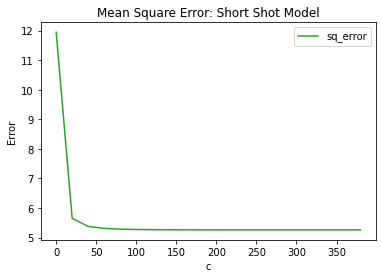

In [297]:
# Creating plot showing optimal c value
short_plot = error_df_short.groupby(['c'])[['sq_error']].mean().plot(kind='line', title='Mean Square Error: Short Shot Model', color='tab:green')
short_plot.set_ylabel('Error')

### Chapter 4 - Predicting on New Data <a class="anchor" id="chapter4"></a>

#### 4.1 - Importing 2021 Data <a class="anchor" id="4_1"></a>

In [245]:
# Importing new 2021 data (as at GW18) for assessing performance of all 3 models
all_shots_2021 = pd.read_csv('all_shots_2021.csv')
all_shots_2021.head()

,Unnamed: 0,shot_type,situation,result,xG,minute,team_score,opponent_score,name,understat_id,location,team,opponent,assist,date,match_id,season,position
0,425981,RightFoot,FromCorner,MissedShots,0.013682,19,0,3,Lukas Rupp,62,h,Norwich,Liverpool,NaN,2021-08-14 16:30:00,16383,2021,"(0.7290000152587891, 0.6309999847412109)"
1,426009,LeftFoot,OpenPlay,MissedShots,0.027758,89,0,3,Lukas Rupp,62,h,Norwich,Liverpool,Kieran Dowell,2021-08-14 16:30:00,16383,2021,"(0.7730000305175782, 0.549000015258789)"
2,425990,Head,OpenPlay,BlockedShot,0.026904,44,0,3,Lukas Rupp,62,h,Norwich,Liverpool,Milot Rashica,2021-08-14 16:30:00,16383,2021,"(0.8959999847412109, 0.565)"
3,426007,RightFoot,OpenPlay,MissedShots,0.009881,86,0,3,Max Aarons,7688,h,Norwich,Liverpool,Kieran Dowell,2021-08-14 16:30:00,16383,2021,"(0.7480000305175781, 0.29100000381469726)"
4,426005,LeftFoot,SetPiece,BlockedShot,0.133259,86,0,3,Grant Hanley,7690,h,Norwich,Liverpool,NaN,2021-08-14 16:30:00,16383,2021,"(0.9169999694824219, 0.514000015258789)"


In [246]:
# Adding goals column to 2021 data

# Adding G column for goals (1 for a goal, 0 for not)
all_shots_2021['G'] = 0
# Setting value of 1 where there is a goal
all_shots_2021.loc[all_shots_2021['result'] == 'Goal', 'G'] = 1
all_shots_2021.head()

,Unnamed: 0,shot_type,situation,result,xG,minute,team_score,opponent_score,name,understat_id,location,team,opponent,assist,date,match_id,season,position,G
0,425981,RightFoot,FromCorner,MissedShots,0.013682,19,0,3,Lukas Rupp,62,h,Norwich,Liverpool,NaN,2021-08-14 16:30:00,16383,2021,"(0.7290000152587891, 0.6309999847412109)",0
1,426009,LeftFoot,OpenPlay,MissedShots,0.027758,89,0,3,Lukas Rupp,62,h,Norwich,Liverpool,Kieran Dowell,2021-08-14 16:30:00,16383,2021,"(0.7730000305175782, 0.549000015258789)",0
2,425990,Head,OpenPlay,BlockedShot,0.026904,44,0,3,Lukas Rupp,62,h,Norwich,Liverpool,Milot Rashica,2021-08-14 16:30:00,16383,2021,"(0.8959999847412109, 0.565)",0
3,426007,RightFoot,OpenPlay,MissedShots,0.009881,86,0,3,Max Aarons,7688,h,Norwich,Liverpool,Kieran Dowell,2021-08-14 16:30:00,16383,2021,"(0.7480000305175781, 0.29100000381469726)",0
4,426005,LeftFoot,SetPiece,BlockedShot,0.133259,86,0,3,Grant Hanley,7690,h,Norwich,Liverpool,NaN,2021-08-14 16:30:00,16383,2021,"(0.9169999694824219, 0.514000015258789)",0


#### 4.2 - Model Prediction <a class="anchor" id="4_2"></a>

In [253]:
# Grouping 2021 xG and G
xG_2021 = all_shots_2021.groupby(['name'])[['xG','G']].sum()
xG_2021

,xG,G
name,,
Aaron Connolly,0.599489,0
Aaron Cresswell,0.448853,1
Aaron Lennon,0.082107,0
Aaron Wan-Bissaka,0.062908,0
Abdoulaye Doucouré,1.609352,2
...,...,...
Yerry Mina,0.043036,0
Yoane Wissa,0.701886,2
Youri Tielemans,1.952338,4


In [255]:
# Separating 2020 data for testing
all_shots_2020 = all_shots.loc[all_shots['season'] == 2020]
xG_2020 = all_shots_2020.groupby(['name'])[['xG','G']].sum()
xG_2020

,xG,G
name,,
Aaron Connolly,4.464137,2
Aaron Cresswell,0.883464,0
Aaron Wan-Bissaka,0.932454,2
Abdoulaye Doucouré,2.369523,2
Aboubakar Kamara,0.654920,0
...,...,...
Xherdan Shaqiri,0.424721,0
Yan Valery,0.292914,0
Yerry Mina,1.749434,2


In [261]:
# Finding players who played in both 2020 and 2021 to make a sample:

# Appending both dfs together, note removed columns / new variables made above won't be present in both
# we only need the xG, G, season and name variables
xG_2020_2021_df = all_shots_2020.append(all_shots_2021)
xG_2020_2021 = xG_2020_2021_df.groupby(['name', 'season'])[['xG','G']].sum()
xG_2020_2021

xG  G
name            season             
Aaron Connolly  2020    4.464137  2
                2021    0.599489  0
Aaron Cresswell 2020    0.883464  0
                2021    0.448853  1
Aaron Lennon    2021    0.082107  0
...                          ... ..
Youri Tielemans 2020    2.645866  4
                2021    1.952338  4
Yves Bissouma   2020    1.076823  1
                2021    0.420949  0
Zanka           2021    0.142173  1

[816 rows x 2 columns]

In [272]:
error_df_test = pd.DataFrame(columns=["player", "train_season", "test_season", "c", "sq_error"])

for player in xG_2020_2021.index.get_level_values("name"):
    for season_x, season_y, c in it.product(xG_2020_2021.xs(player).index, xG_2020_2021.xs(player).index, (100, 8, 280)):
        if season_x == 2020:
            if season_y == 2021:
                row = {
                    "player": player,
                    "train_season": season_x,
                    "test_season": season_y,
                    "c": c,
                    "sq_error": (xG_2020_2021.loc[(player, season_y), "G"] - (((xG_2020_2021.loc[(player, season_x), "G"] + c) / (xG_2020_2021.loc[(player, season_x), "xG"] + c)) * xG_2020_2021.loc[(player, season_y), "xG"]))**2
                    }
                error_df_test.loc[len(error_df_test)] = row

In [274]:
# Collating average of errors for each model to find minimum (and therefore optimal model)
average_c_test = error_df_test.groupby(['c'])[['sq_error']].mean()
average_c_test

,sq_error
c,
8,1.041262
100,0.941822
280,0.938917


We can see a c value of 280 provides the lowest MSE, showing the short shot model seeming to be the best predictor surprisingly.